In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

from random import randint

In [2]:
def generate_list(n, cut_prob):
    s = ''
    for i in range(n):
#         s += str(randint(0, 1))
        s += str(random.choices([0, 1], [1-cut_prob, cut_prob])[0])
    return s


def and_gate(a, b):
    c = bin(int(a, base=2) & int(b, base=2))[2:]
    c = c.count('1')
    return c


n = 10
cut_prob = .2
a = generate_list(n, cut_prob)
totes = []

for i in range(100):
    b = generate_list(n, cut_prob)
    c = and_gate(a, b)
    totes.append(c)
    a = b
print(sum(totes)/len(totes))

0.41


In [3]:
mx = []

for i in range(10):
    mx.append([generate_list(n, cut_prob)])
mx = np.array(mx)
print(mx)

[['0010000000']
 ['1000000110']
 ['0100000000']
 ['0000011000']
 ['0000110000']
 ['1000000010']
 ['0010000000']
 ['0000010001']
 ['0000000000']
 ['0010101001']]


### new approach, based entirely on probability of fragment within a given window

In [4]:
site_ls = [2, 45, 240, 500, 589, 678, 799, 1200, 1500, 1798, 2500, 2543, 2834]

In [5]:
def prob_dictionary(cut_prob, site_range):
    '''
    the probability for each site 0 to site i fragment surviving is
    the product of the probability of the sites 0 and i being cut and
    the intermediate sites not being cut
    '''
    prob_dt = {}
    for i in range(1, site_range):
        prob_dt[(0, i)] = (cut_prob ** 2) * ((1-cut_prob)**(i-1))

    return prob_dt


def get_read_counts(prob_dt, n):
    read_counts = {}
    for k, v in prob_dt.items():
        counts = v*n
        print(f'{k} : {counts}')
        read_counts[k] = counts
        
    return read_counts


def print_rations(read_counts):
    for k, v in read_counts.items():
        if k == (0, 1):
            last =  v
        else:
            ratio = last / v
            print(ratio)
            last = v

            
def define_clusters(site_ls, window):
    for idx, site in enumerate(site_ls):
        cluster = [site]
        for sub_site in site_ls[idx+1:]:
            if sub_site - site <= window:
                cluster.append(sub_site)
                print(cluster)
            else:
                #TODO this is where you process the cluster
                break


site_range = 10 # expected neighboring sites in a 'cluster'
window = 500
cut_prob = 0.8
n = 10000
prob_dt = prob_dictionary(cut_prob, site_range)
read_counts = get_read_counts(prob_dt, n)
print_rations(read_counts)
# define_clusters(site_ls, window)

(0, 1) : 6400.000000000001
(0, 2) : 1280.0
(0, 3) : 255.99999999999991
(0, 4) : 51.19999999999998
(0, 5) : 10.239999999999993
(0, 6) : 2.047999999999998
(0, 7) : 0.4095999999999995
(0, 8) : 0.08191999999999988
(0, 9) : 0.01638399999999997
5.000000000000001
5.000000000000002
5.0
5.000000000000002
5.000000000000002
5.000000000000001
5.000000000000002
5.000000000000002


In [6]:
def define_clusters(site_ls, window):
    for idx, site in enumerate(site_ls):
        cluster = [site]
        for sub_site in site_ls[idx+1:]:
            if sub_site - site <= window:
                cluster.append(sub_site)
                print(cluster)
            else:
                #TODO this is where you process the cluster
                break


def prob_dictionary(cut_prob, site_range):
    '''
    the probability for each site 0 to site i fragment surviving is
    the product of the probability of the sites 0 and i being cut and
    the intermediate sites not being cut
    '''
    prob_dt = {}
    for i in range(1, site_range):
        prob_dt[(0, i)] = (cut_prob ** 2) * ((1-cut_prob)**(i-1))

    return prob_dt


def get_read_counts(prob_dt, n):
    read_counts = {}
    for k, v in prob_dt.items():
        counts = v*n
#         print(f'{k} : {counts}')
        read_counts[k] = counts
        
    return read_counts


def print_rations(read_counts):
    for k, v in read_counts.items():
        if k == (0, 1):
            last =  v
        else:
            ratio = last / v
#             print(ratio)
            last = v
    return ratio


prob_ls, ratio_ls = [], []
for cut_prob in np.arange(0.05, 1, 0.01):
    prob_ls.append(cut_prob)
    site_range = 10 # expected neighboring sites in a 'cluster'
    window = 500
    n = 10000
    prob_dt = prob_dictionary(cut_prob, site_range)
    read_counts = get_read_counts(prob_dt, n)
    ratio_ls.append(print_rations(read_counts))
    # define_clusters(site_ls, window)

Text(0, 0.5, 'ratio of small:large fragments')

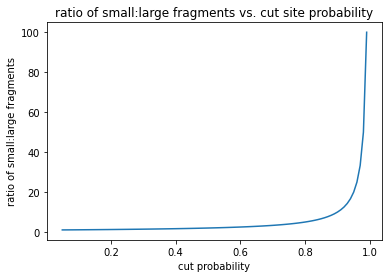

In [7]:
plt.plot(prob_ls, ratio_ls)
plt.title('ratio of small:large fragments vs. cut site probability')
plt.xlabel('cut probability')
plt.ylabel('ratio of small:large fragments')

Text(0, 0.5, 'ratio of small:large fragments')

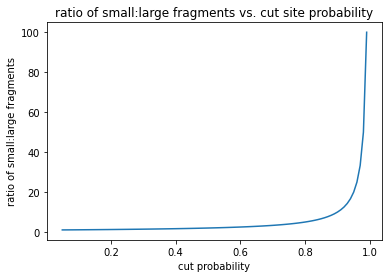

In [8]:
y = [(i**2) / ((i ** 2) * (1-i)) for i in prob_ls]
plt.plot(prob_ls, y)
plt.title('ratio of small:large fragments vs. cut site probability')
plt.xlabel('cut probability')
plt.ylabel('ratio of small:large fragments')

y = x^2 / (x^2 * (1-x))

Let's say we have an observed ratio of 5, assume no PCR bias.

5 = x^2 / (x^2 * (1-x))

5 = 1 / (1-x)  
5 - 5x = 1  
-5x = -4  
x = 4/5  
x = 0.8